# 6. Introdução a Machine Learning: Regressão

# Pergunta
Com este conjunto de dados que inclui o número de médicos e enfermeiros em várias especialidades será que consigo estimar o nº de total de Enfermeiros - Especialistas - Em Saúde Infantil e Pediátrica em cada hospital? 
<br>Coluna **C31011**


# 7. Regressão Linear usando Statsmodels package

In [1]:
import numpy as np
import pandas as pd

Before importing files is always wise to check the working directory.

In [2]:
%pwd

'C:\\Users\\sonia.quaresma\\PythonPlayground'

In [3]:
datadir ="datasets\\"
filename = "df_prep.csv"

reading the file with pandas to be stored as a dataframe

In [4]:
df_hosp = pd.read_csv(f"{datadir}{filename}", index_col=0, verbose = False, encoding='latin-1')
df_hosp.head()

,NORDEM,NUTS2,C10001,C20001,C21001,C21011,C21021,C21031,C21041,C21061,...,C31001,C31011,C31021,C31031,C31041,C31051,C31061,C31071,C32001,t_cirurgia
ANO,,,,,,,,,,,,,,,,,,,,,
2012.0,229.0,17.0,1458.0,247.0,159.00,2.0,11.0,0.0,5.0,0.0,...,39.0,8.0,19.0,2.0,2.0,3.0,5.0,0.0,454.0,yes
2012.0,206.0,17.0,144.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,no
2012.0,65.0,16.0,894.0,111.0,38.25,0.0,8.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.0,yes
2012.0,106.0,17.0,801.0,166.0,108.00,0.0,12.0,0.0,7.0,0.0,...,36.0,4.0,16.0,5.0,2.0,2.0,7.0,0.0,228.0,yes
2012.0,209.0,11.0,221.0,13.0,13.00,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,1.0,0.0,1.0,6.0,0.0,80.0,yes


In [5]:
df_hosp.describe()

,NORDEM,NUTS2,C10001,C20001,C21001,C21011,C21021,C21031,C21041,C21061,...,C30001,C31001,C31011,C31021,C31031,C31041,C31051,C31061,C31071,C32001
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,...,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,118.081395,14.976744,642.744186,113.872093,73.979651,0.813953,6.941860,0.360465,2.953488,0.302326,...,212.290698,22.941860,3.127907,6.220930,4.476744,3.465116,0.965116,3.465116,1.220930,189.348837
std,68.264230,3.620129,809.928453,172.413511,108.256016,2.144825,10.384779,1.146994,5.346592,1.701693,...,255.792649,26.911775,4.752204,10.678622,5.740930,8.559409,1.482825,4.421066,2.783993,240.396475
min,3.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.500000,11.000000,120.250000,7.750000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,34.250000,3.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
50%,119.000000,16.000000,338.500000,42.500000,33.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,102.500000,10.000000,0.000000,0.000000,3.000000,1.000000,0.000000,2.000000,0.000000,85.500000
75%,175.750000,17.000000,872.500000,162.500000,115.500000,0.000000,10.750000,0.000000,3.750000,0.000000,...,321.250000,35.750000,4.000000,11.000000,6.000000,3.000000,1.000000,5.000000,1.000000,282.250000
max,229.000000,30.000000,5325.000000,1161.000000,719.000000,13.000000,51.000000,6.000000,31.000000,13.000000,...,1515.000000,103.000000,21.000000,50.000000,28.000000,72.000000,6.000000,19.000000,15.000000,1515.000000


In [6]:
df_hosp = df_hosp.reset_index()

In [8]:
# Definimos y como o nosso target
X = df_hosp.drop(columns=['t_cirurgia'])
y = df_hosp['t_cirurgia'].values

In [9]:
# criação de matriz de correlação e selecão do triângulo superior
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

In [10]:
# seleciona para remover as colunas altamente correlacionadas
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

['C20001', 'C21001', 'C21021', 'C21071', 'C21251', 'C21421', 'C21431', 'C23001', 'C24001', 'C30001', 'C32001']


In [11]:
df_hosp = df_hosp.drop(columns=to_drop, axis=1)

In [12]:
df_hosp.head()

,ANO,NORDEM,NUTS2,C10001,C21011,C21031,C21041,C21061,C21081,C21091,...,C22001,C31001,C31011,C31021,C31031,C31041,C31051,C31061,C31071,t_cirurgia
0,2012.0,229.0,17.0,1458.0,2.0,0.0,5.0,0.0,0.0,0.0,...,4.0,39.0,8.0,19.0,2.0,2.0,3.0,5.0,0.0,yes
1,2012.0,206.0,17.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no
2,2012.0,65.0,16.0,894.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes
3,2012.0,106.0,17.0,801.0,0.0,0.0,7.0,0.0,0.0,0.0,...,7.0,36.0,4.0,16.0,5.0,2.0,2.0,7.0,0.0,yes
4,2012.0,209.0,11.0,221.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,1.0,0.0,1.0,6.0,0.0,yes


In [13]:
import statsmodels.formula.api as smf

est = smf.ols('C31011 ~ C31001',data = df_hosp).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 C31011   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     177.9
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.89e-22
Time:                        10:29:40   Log-Likelihood:                -206.66
No. Observations:                  86   AIC:                             417.3
Df Residuals:                      84   BIC:                             422.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2111      0.385     -0.549      0.5

In [14]:
# Este é o R entre as 2 variáveis
r = cor_matrix.loc['C31001','C31011']
r

0.8242029193194886

In [15]:
# E este é o r quadrado
r2 = r**2
r2

0.6793104522147675

In [16]:
import statsmodels.formula.api as smf

est = smf.ols('C31011 ~ C31001 + C21011',data = df_hosp).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 C31011   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     88.60
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           2.55e-21
Time:                        10:30:00   Log-Likelihood:                -206.43
No. Observations:                  86   AIC:                             418.9
Df Residuals:                      83   BIC:                             426.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2542      0.391     -0.650      0.5

In [17]:
import statsmodels.formula.api as smf

est = smf.ols('C31011 ~ C31001 + C21361',data = df_hosp).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 C31011   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     95.36
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           3.12e-22
Time:                        10:30:01   Log-Likelihood:                -204.26
No. Observations:                  86   AIC:                             414.5
Df Residuals:                      83   BIC:                             421.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2519      0.377     -0.669      0.5

In [18]:
# reorganiza as colunas para colocar a coluna target no fim
last_cols = ['C31011']
first_cols = [col for col in df_hosp.columns if col not in last_cols]

df = df_hosp[first_cols+last_cols]
df.head()

,ANO,NORDEM,NUTS2,C10001,C21011,C21031,C21041,C21061,C21081,C21091,...,C22001,C31001,C31021,C31031,C31041,C31051,C31061,C31071,t_cirurgia,C31011
0,2012.0,229.0,17.0,1458.0,2.0,0.0,5.0,0.0,0.0,0.0,...,4.0,39.0,19.0,2.0,2.0,3.0,5.0,0.0,yes,8.0
1,2012.0,206.0,17.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,0.0
2,2012.0,65.0,16.0,894.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes,0.0
3,2012.0,106.0,17.0,801.0,0.0,0.0,7.0,0.0,0.0,0.0,...,7.0,36.0,16.0,5.0,2.0,2.0,7.0,0.0,yes,4.0
4,2012.0,209.0,11.0,221.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,1.0,0.0,1.0,6.0,0.0,yes,0.0


In [19]:
import statsmodels.formula.api as smf

string_cols = ' + '.join(df.columns[:-1])
est = smf.ols('C31011 ~ {}'.format(string_cols),data = df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 C31011   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.076e+26
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          2.36e-279
Time:                        10:30:03   Log-Likelihood:                 2019.4
No. Observations:                  71   AIC:                            -3939.
Df Residuals:                      21   BIC:                            -3826.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.698e-18   5.77e-2

# Isto será possível? Comente os resultados!

In [20]:
df = df.drop(columns='C31001', axis=1)
df.head()

,ANO,NORDEM,NUTS2,C10001,C21011,C21031,C21041,C21061,C21081,C21091,...,C21441,C22001,C31021,C31031,C31041,C31051,C31061,C31071,t_cirurgia,C31011
0,2012.0,229.0,17.0,1458.0,2.0,0.0,5.0,0.0,0.0,0.0,...,0.0,4.0,19.0,2.0,2.0,3.0,5.0,0.0,yes,8.0
1,2012.0,206.0,17.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,0.0
2,2012.0,65.0,16.0,894.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes,0.0
3,2012.0,106.0,17.0,801.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,7.0,16.0,5.0,2.0,2.0,7.0,0.0,yes,4.0
4,2012.0,209.0,11.0,221.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,6.0,0.0,yes,0.0


In [21]:
import statsmodels.formula.api as smf

string_cols = ' + '.join(df.columns[:-1])
est = smf.ols('C31011 ~ {}'.format(string_cols),data = df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 C31011   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     39.38
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.05e-13
Time:                        10:30:16   Log-Likelihood:                -55.748
No. Observations:                  71   AIC:                             209.5
Df Residuals:                      22   BIC:                             320.4
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           6.22e-07   2.44e-0

# 8. Regressão Linear usando Scikit package

In [22]:
df_hosp.head()

,ANO,NORDEM,NUTS2,C10001,C21011,C21031,C21041,C21061,C21081,C21091,...,C22001,C31001,C31011,C31021,C31031,C31041,C31051,C31061,C31071,t_cirurgia
0,2012.0,229.0,17.0,1458.0,2.0,0.0,5.0,0.0,0.0,0.0,...,4.0,39.0,8.0,19.0,2.0,2.0,3.0,5.0,0.0,yes
1,2012.0,206.0,17.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no
2,2012.0,65.0,16.0,894.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes
3,2012.0,106.0,17.0,801.0,0.0,0.0,7.0,0.0,0.0,0.0,...,7.0,36.0,4.0,16.0,5.0,2.0,2.0,7.0,0.0,yes
4,2012.0,209.0,11.0,221.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,1.0,0.0,1.0,6.0,0.0,yes


In [23]:
# seleciona para remover as colunas ano e ordem
to_drop = ['ANO','NORDEM']
df = df_hosp.drop(columns=to_drop, axis=1)

In [24]:
df1 = df.dropna()

In [25]:
# define a variável target e as features
X = df1.drop(columns=['C31011'])
y = df1['C31011'].values

In [26]:
## Typecast da coluna para categoria em pandas
X['NUTS2'] = pd.Categorical(X.NUTS2)
X.dtypes

NUTS2         category
C10001         float64
C21011         float64
C21031         float64
C21041         float64
C21061         float64
C21081         float64
C21091         float64
C21101         float64
C21111         float64
C21121         float64
C21131         float64
C21141         float64
C21151         float64
C21161         float64
C21171         float64
C21181         float64
C21191         float64
C21201         float64
C21211         float64
C21221         float64
C21231         float64
C21241         float64
C21261         float64
C21271         float64
C21281         float64
C21291         float64
C21301         float64
C21311         float64
C21321         float64
C21331         float64
C21341         float64
C21351         float64
C21361         float64
C21371         float64
C21381         float64
C21391         float64
C21401         float64
C21411         float64
C21441         float64
C22001         float64
C31001         float64
C31021         float64
C31031     

In [27]:
X.shape

(71, 49)

In [28]:
# cria variáveis dummy e faz drop da baseline
X = pd.get_dummies(X, drop_first = True)

In [29]:
X.shape

(71, 54)

In [30]:
from sklearn.feature_selection import VarianceThreshold # Feature selector

thresholder = VarianceThreshold(threshold=.2)
X = thresholder.fit_transform(X)

In [31]:
X.shape

(71, 45)

In [32]:
from sklearn.model_selection import train_test_split 

#Split data for machine learning
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size = 0.2 ,random_state = 2002)
print(X_train.shape)
print(X_test.shape)

(56, 45)
(15, 45)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [34]:
scaler.mean_

array([7.34839286e+02, 1.00000000e+00, 4.82142857e-01, 3.57142857e+00,
       4.64285714e-01, 2.32142857e-01, 3.92857143e-01, 1.25000000e+00,
       8.92857143e-01, 6.78571429e-01, 6.25000000e-01, 1.78571429e+00,
       6.01785714e+00, 8.57142857e-01, 5.17857143e-01, 1.19642857e+00,
       2.67857143e-01, 1.48214286e+00, 7.85714286e-01, 1.96428571e-01,
       1.37500000e+00, 4.46428571e-01, 1.41071429e+00, 4.28571429e-01,
       1.92857143e+00, 1.07142857e+00, 4.41071429e+00, 1.87500000e+00,
       2.57142857e+00, 7.46428571e+00, 2.78571429e+00, 3.94642857e+00,
       4.64285714e-01, 2.66071429e+00, 5.00000000e-01, 3.26785714e+00,
       2.59821429e+01, 7.67857143e+00, 5.00000000e+00, 3.28571429e+00,
       1.19642857e+00, 3.60714286e+00, 1.44642857e+00, 2.67857143e-01,
       6.42857143e-01])

In [35]:
scaler.scale_

array([8.74428584e+02, 2.52133751e+00, 1.33618689e+00, 6.04110072e+00,
       2.07849779e+00, 9.99840549e-01, 1.31852964e+00, 2.49463711e+00,
       3.02772057e+00, 1.94667430e+00, 2.03155904e+00, 3.17756806e+00,
       9.61303258e+00, 2.59414569e+00, 1.79275398e+00, 2.14991398e+00,
       6.67914436e-01, 1.98198198e+00, 3.08634253e+00, 7.65777916e-01,
       3.85710152e+00, 2.14575697e+00, 3.19473219e+00, 1.56817846e+00,
       4.09205302e+00, 2.73115061e+00, 5.38442458e+00, 2.92197646e+00,
       5.15425325e+00, 1.15123603e+01, 6.52663304e+00, 8.26658429e+00,
       9.99362041e-01, 4.31888207e+00, 2.01777813e+00, 7.27395322e+00,
       2.81339215e+01, 1.19658848e+01, 6.17888108e+00, 4.58535824e+00,
       1.65205114e+00, 4.30397894e+00, 2.98160816e+00, 4.42842742e-01,
       4.79157424e-01])

In [36]:
X_scaled = scaler.transform(X_train)

In [37]:
X_train

array([[5.325e+03, 1.300e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.840e+02, 0.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [1.880e+03, 4.000e+00, 0.000e+00, ..., 6.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [2.720e+02, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [5.860e+02, 0.000e+00, 0.000e+00, ..., 2.000e+00, 0.000e+00,
        1.000e+00],
       [1.190e+02, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])

In [38]:
X_scaled

array([[ 5.24932601,  4.75937868,  4.12955491, ..., -0.48511692,
        -0.60485838, -1.34164079],
       [-0.4012212 , -0.39661489, -0.3608349 , ..., -0.14972744,
        -0.60485838,  0.74535599],
       [ 1.30961034,  1.18984467, -0.3608349 , ...,  1.52721994,
        -0.60485838,  0.74535599],
       ...,
       [-0.52930484, -0.39661489, -0.3608349 , ..., -0.48511692,
        -0.60485838,  0.74535599],
       [-0.1702132 , -0.39661489, -0.3608349 , ...,  0.18566203,
        -0.60485838,  0.74535599],
       [-0.70427625, -0.39661489, -0.3608349 , ..., -0.14972744,
         1.65327957, -1.34164079]])

In [39]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
lr.fit(X_scaled,y_train)

LinearRegression()

In [40]:
lr.coef_

array([ 1.02332032e-14, -1.44045339e-14, -2.44564061e-14, -1.40628255e-14,
        1.19349209e-15,  8.30694357e-15,  3.22868001e-14,  1.91783016e-14,
        5.58976680e-15, -4.99556601e-14, -2.00913071e-15, -6.49906453e-15,
       -4.23016518e-15, -2.52947747e-15,  1.20583095e-14,  1.46103472e-14,
        5.92535903e-15, -4.89915568e-15, -6.88000160e-15,  1.56858111e-14,
       -8.06762658e-15,  7.94561462e-16, -2.88722876e-14,  8.15760854e-15,
       -2.23355592e-14, -1.12181660e-14, -1.19353394e-16,  5.71435038e-15,
       -1.45024808e-14, -1.02193579e-15,  4.51335941e-17,  2.52723815e-15,
        7.31669348e-15,  3.66871988e-15,  1.59886615e-15,  1.50188228e-15,
        2.81339215e+01, -1.19658848e+01, -6.17888108e+00, -4.58535824e+00,
       -1.65205114e+00, -4.30397894e+00, -2.98160816e+00,  4.90527727e-15,
        5.80943174e-15])

In [41]:
y_pred = lr.predict(X_test)

In [42]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

-45066.183733734906

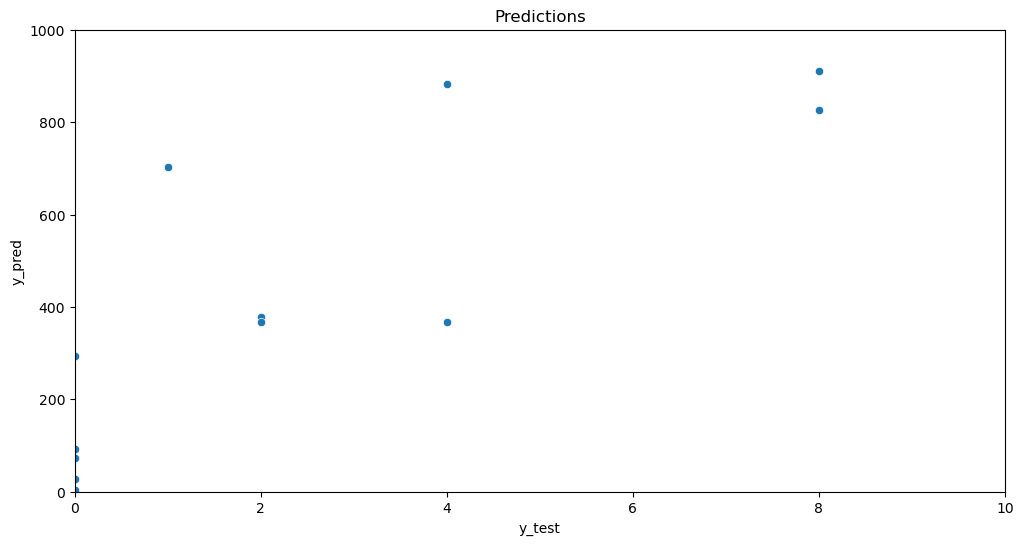

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

plt.figure(figsize = (12,6))
sns.scatterplot(x= y_test, y= y_pred)
plt.xlim(0, 10)
plt.ylim(0, 1000)
plt.title("Predictions")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Vamos tentar de outra forma...

In [45]:
# define a variável target e os predictors
X_2nd = df1.drop(columns=['C31011'])
y_2nd = df1['C31011'].values

In [46]:
## Typecast da coluna para categoria em pandas
X_2nd['NUTS2'] = pd.Categorical(X_2nd.NUTS2)
# cria variáveis dummy e faz drop da baseline
X_2nd = pd.get_dummies(X_2nd, drop_first = True)

In [47]:
#Split data for machine learning
X_2nd_train, X_2nd_test, y_2nd_train, y_2nd_test = train_test_split(X_2nd,  y_2nd, test_size = 0.2 ,random_state = 2002)
print(X_2nd_train.shape)
print(X_2nd_test.shape)

(56, 54)
(15, 54)


In [48]:
lr2 = LinearRegression()
lr2.fit(X_2nd_train,y_2nd_train)

LinearRegression()

In [49]:
lr2.coef_

array([-1.94368049e-16,  1.15740750e-14,  3.65124597e-14, -5.35682609e-14,
        4.23966418e-14,  1.88377092e-13, -1.38195011e-12, -2.77805556e-13,
        1.91402449e-13,  2.22044605e-15,  4.28074243e-13, -3.64153152e-14,
       -6.58084698e-14, -6.10952261e-13,  8.82627305e-15, -8.14626144e-15,
        3.89965837e-14,  2.38975506e-14, -5.86435414e-13, -1.49324997e-13,
       -5.03069808e-16,  5.49560397e-15, -6.99412750e-13,  8.01858580e-14,
        4.98212582e-13, -1.86101135e-14, -2.15188978e-13,  7.42461648e-16,
       -2.53824739e-14,  8.99280650e-15,  1.99840144e-15,  3.91700561e-14,
       -3.00454106e-15,  1.96093142e-14, -6.99440506e-15,  4.83502127e-14,
        1.44051437e-14,  2.33799091e-13, -5.55111512e-17,  7.66053887e-15,
        1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.99840144e-15,
        2.41404119e-14,  4.50056659e-14, -1.65222003e-13,  3.51866106e-13,
       -2.44946424e-12,  

In [50]:
y_2nd_pred = lr2.predict(X_2nd_test)

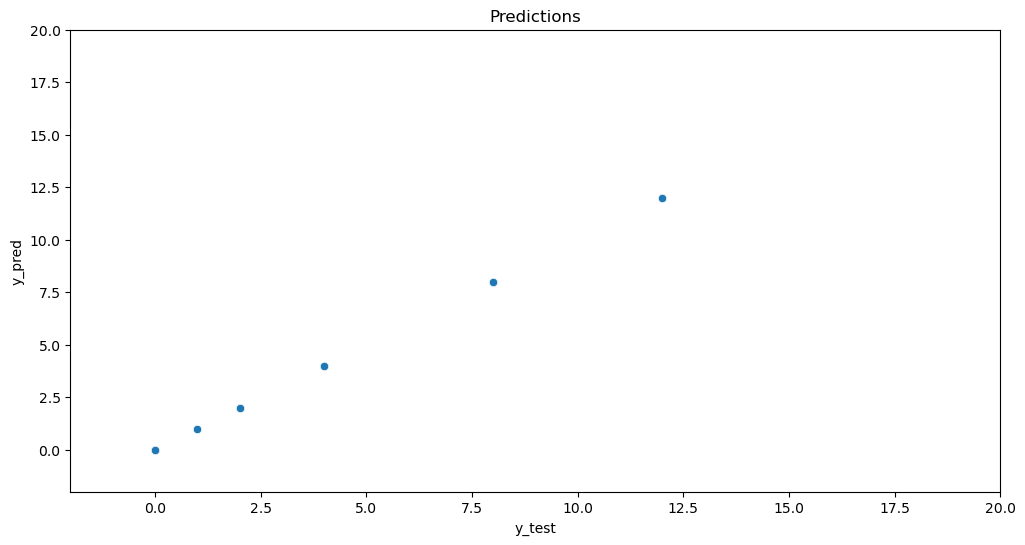

In [51]:
# we choose the x axis as index, chossing year will give a discrete plot
plt.figure(figsize = (12,6))
sns.scatterplot(x= y_2nd_test, y= y_2nd_pred)
plt.xlim(-2, 20)
plt.ylim(-2, 20)
plt.title("Predictions")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [52]:
y_2nd_test

array([ 0.,  4.,  0.,  0.,  8.,  2.,  0.,  1.,  0.,  2.,  8., 12.,  0.,
        0.,  4.])

In [53]:
y_2nd_pred

array([-1.40554235e-13,  4.00000000e+00, -4.72538675e-15, -2.49509441e-12,
        8.00000000e+00,  2.00000000e+00, -4.27435864e-14,  1.00000000e+00,
        4.87725222e-15,  2.00000000e+00,  8.00000000e+00,  1.20000000e+01,
        4.03843625e-14,  2.20386234e-14,  4.00000000e+00])

In [54]:
r2_score(y_2nd_test, y_2nd_pred)

1.0

# C31001 :)

In [55]:
# define a variável target e os predictors
X_3rd = df1.drop(columns=['C31011', 'C31001'])
y_3rd = df1['C31011'].values

In [56]:
## Typecast da coluna para categoria em pandas
X_3rd['NUTS2'] = pd.Categorical(X_3rd.NUTS2)
# cria variáveis dummy e faz drop da baseline
X_3rd = pd.get_dummies(X_3rd, drop_first = True)

In [57]:
#Split data for machine learning
X_3rd_train, X_3rd_test, y_3rd_train, y_3rd_test = train_test_split(X_3rd,  y_3rd, test_size = 0.2 ,random_state = 2002)
print(X_3rd_train.shape)
print(X_3rd_test.shape)

(56, 53)
(15, 53)


In [58]:
lr3 = LinearRegression()
lr3.fit(X_3rd_train,y_3rd_train)
lr3.coef_

array([-2.89065165e-03,  5.41320479e+00,  7.52508894e+00, -2.51991314e+00,
       -1.38806027e+00,  3.89513026e+01, -6.38321113e+01, -1.85914497e+01,
        1.39598080e+01,  1.13122965e-01,  2.48179866e+01,  2.76124915e+00,
       -9.72914071e+00,  1.57918396e+01,  8.85392279e-01,  1.35181584e+00,
        1.49772845e-01,  1.77607406e+00, -2.73519188e+01, -1.50593912e+01,
        1.73988830e-01,  1.28398713e+00, -1.93473069e+01,  3.98023055e+00,
        1.29523386e+01, -3.31543616e+00, -1.49145538e+01, -3.28300461e-02,
       -2.80431048e+00,  7.84716044e-01,  1.85229891e+00,  2.71964178e+00,
       -2.34258012e-01,  9.26484042e-01, -4.03718916e-01, -8.32495907e-01,
        1.32607411e+00, -1.49737685e+00, -3.09974268e-13,  5.15923351e-01,
       -8.48951953e-01, -1.25860009e-01,  1.97142581e-01, -2.58385488e-01,
       -4.37086520e-02, -1.17080763e-01, -3.85317775e+00,  4.22138930e-01,
        1.70055611e+00, -7.94168448e+00,  8.94329198e+00, -1.63172288e+02,
        1.23030119e+00])

In [59]:
y_3rd_pred = lr3.predict(X_3rd_test)

# 9. Avaliação de Modelos de Regressão

In [60]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

In [61]:
print("                   MAE             MSE           RMSE          MedAE         R2")
print("     1ª Tentativa {:.12} {:.10f} {:.8f} {:.8f} {:.8f}"
        .format(mean_absolute_error(y_test, y_pred),
                mean_squared_error(y_test,y_pred),
                mean_squared_error(y_test,y_pred,squared=False),
                median_absolute_error(y_test,y_pred),
                r2_score(y_test,y_pred)))
print("     2º Tentativa: {:.12f} {:.10f} {:.10f} {:.10f} {:.12f}"
        .format(mean_absolute_error(y_2nd_test, y_2nd_pred),
                mean_squared_error(y_2nd_test,y_2nd_pred),
                mean_squared_error(y_2nd_test,y_2nd_pred,squared=False),
                median_absolute_error(y_2nd_test,y_2nd_pred),
                r2_score(y_2nd_test,y_2nd_pred)))
print("     3º Tentativa: {:.11f} {:.8f} {:.8f} {:.8f} {:.8f}"
        .format(mean_absolute_error(y_3rd_test, y_3rd_pred),
                mean_squared_error(y_3rd_test,y_3rd_pred),
                mean_squared_error(y_3rd_test,y_3rd_pred,squared=False),
                median_absolute_error(y_3rd_test,y_3rd_pred),
                r2_score(y_3rd_test,y_3rd_pred)))

                   MAE             MSE           RMSE          MedAE         R2
     1ª Tentativa 553.426660102 603699.9634376756 776.98131473 364.80029201 -45066.18373373
     2º Tentativa: 0.000000000001 0.0000000000 0.0000000000 0.0000000000 1.000000000000
     3º Tentativa: 48.28875523857 10947.82465799 104.63185298 5.86979198 -816.27290911


# Gravar o modelo

In [62]:
import pickle

# escolher o nome do ficheiro
filename = "linearRegression_SK.pickle"

# gravar o modelo
pickle.dump(lr3, open(filename, "wb"))

In [63]:
# fazer load do modelo
loaded_model = pickle.load(open(filename, "rb"))

In [64]:
loaded_model

LinearRegression()